**Import libraries**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

###***Read Dataset File***

In [2]:
df = pd.read_csv("/content/titanic-training-data.csv")

## ***Show a sample of the dataset***

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S


##**show the shape (rows,columns)of dataset**

In [4]:
df.shape

(891, 12)

##**Find the missing value**

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##**Age-177**
##**Cabin-687**
##**Embarked-2**

##**Find the datatypes**

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##**Age-float**
##**Cabin-object**
##**Embarked-object**


##**Cabin has a large number of missing values so we will drop it**

In [7]:
df.drop("Cabin",axis=1,inplace=True)

In [8]:
df.shape

(891, 11)

##**Handling duplicate records**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(891, 11)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**Viewing all datatypes**

In [15]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


##**Dropping Unwanted Columns**
**PassengerId, Ticket, Fare, Name**

In [16]:
df.drop(["PassengerId", "Ticket", "Fare", "Name"],axis=1,inplace=True)

In [17]:
df.shape

(891, 7)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


##**Dealing with missing values in age**
**Age is float so we will replace the missing values by mean or median, median is usually more suitable**

In [19]:
median1 = df["Age"].median()
median1

28.0

In [20]:
df["Age"].replace(np.nan,median1,inplace=True)

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

##**Dealing with missing value sin Embarked**
**Embarked is object so we replace the missing values with mode**

In [22]:
mode1 = df["Embarked"].mode().values[0]
mode1

'S'

In [23]:
df['Embarked'].replace(np.nan,mode1,inplace=True)

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

##**Now we draw a boxplot to look for outliers in age**

<Axes: ylabel='Age'>

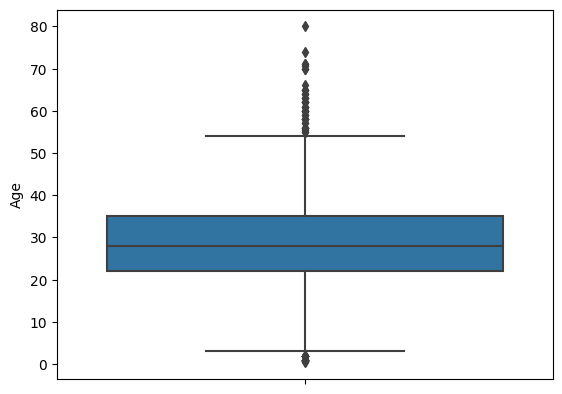

In [25]:
sns.boxplot(y="Age",data=df)

##**We define a function that will remove the outliers**

In [26]:
def remove_outliers(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  iqr=Q3-Q1
  lower_range=Q1-(1.5*iqr)
  upper_range=Q3+(1.5*iqr)
  return lower_range, upper_range

In [27]:
lowage,highage=remove_outliers(df["Age"])
df["Age"]=np.where(df["Age"]>highage,highage,df["Age"])
df["Age"]=np.where(df["Age"]<lowage,lowage,df["Age"])

<Axes: ylabel='Age'>

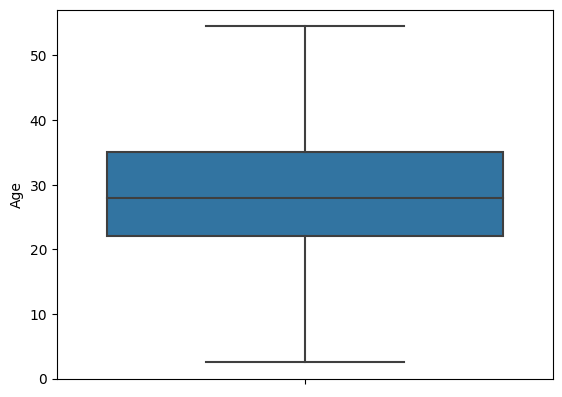

In [28]:
sns.boxplot(y="Age",data=df)

##**Encoding**

In [29]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [30]:
df = pd.get_dummies(df,columns=["Sex","Embarked"])

In [31]:
df=pd.get_dummies(df)

In [32]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


##**Splitting the data**

In [35]:
Y=df["Survived"]
X=df.drop(['Survived'],axis=1)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

##**Fit the model**

In [40]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [41]:
model.score(X_train,Y_train)

0.812199036918138

In [42]:
model.score(X_test,Y_test)

0.7761194029850746

##**Making predictions**

In [43]:
prediction=model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(Y_test,prediction)

0.7761194029850746

In [48]:
from sklearn import metrics

In [49]:
print(metrics.classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.77      0.68      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



##**Confusion matrix**

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[130,  23],
       [ 37,  78]])

In [51]:
cm=metrics.confusion_matrix(Y_test,prediction,labels=[1,0])

<Axes: >

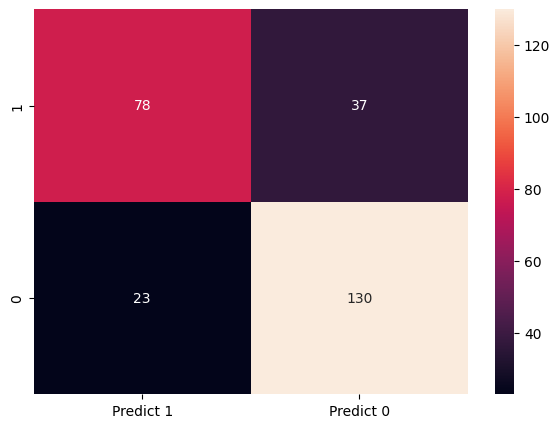

In [53]:
df_cm = pd.DataFrame(cm, index=[i for i in ['1','0']],
                      columns =[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
